In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
path = r'C:\Users\kamal\OneDrive\Desktop\heart.csv'

In [3]:
heart = pd.read_csv(path)

In [4]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

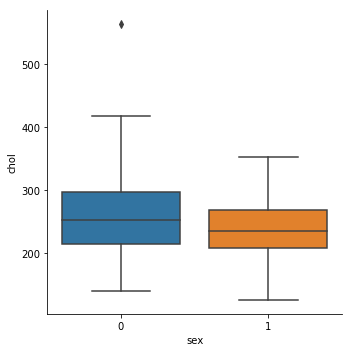

In [6]:
sns.catplot(x='sex', y='chol', data = heart, kind='box')

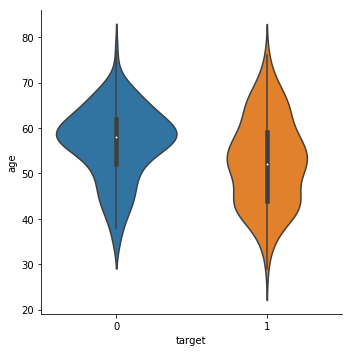

In [22]:
sns.catplot(x='target', y='age', data = heart, kind = 'violin')

In [7]:
heart_features = heart[heart.columns[0:13]]

(array([  1.,   0.,   6.,   5.,   7.,  26.,  19.,  19.,  12.,  25.,  32.,
         28.,  44.,  19.,  19.,  24.,   7.,   7.,   1.,   2.]),
 array([ 29. ,  31.4,  33.8,  36.2,  38.6,  41. ,  43.4,  45.8,  48.2,
         50.6,  53. ,  55.4,  57.8,  60.2,  62.6,  65. ,  67.4,  69.8,
         72.2,  74.6,  77. ]),
 <a list of 20 Patch objects>)

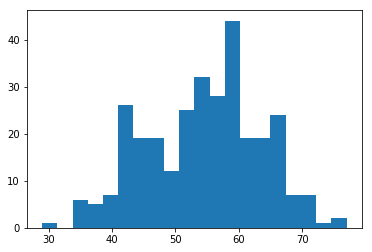

In [8]:
plt.hist(heart.age, bins =20)

In [9]:
heart_features.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


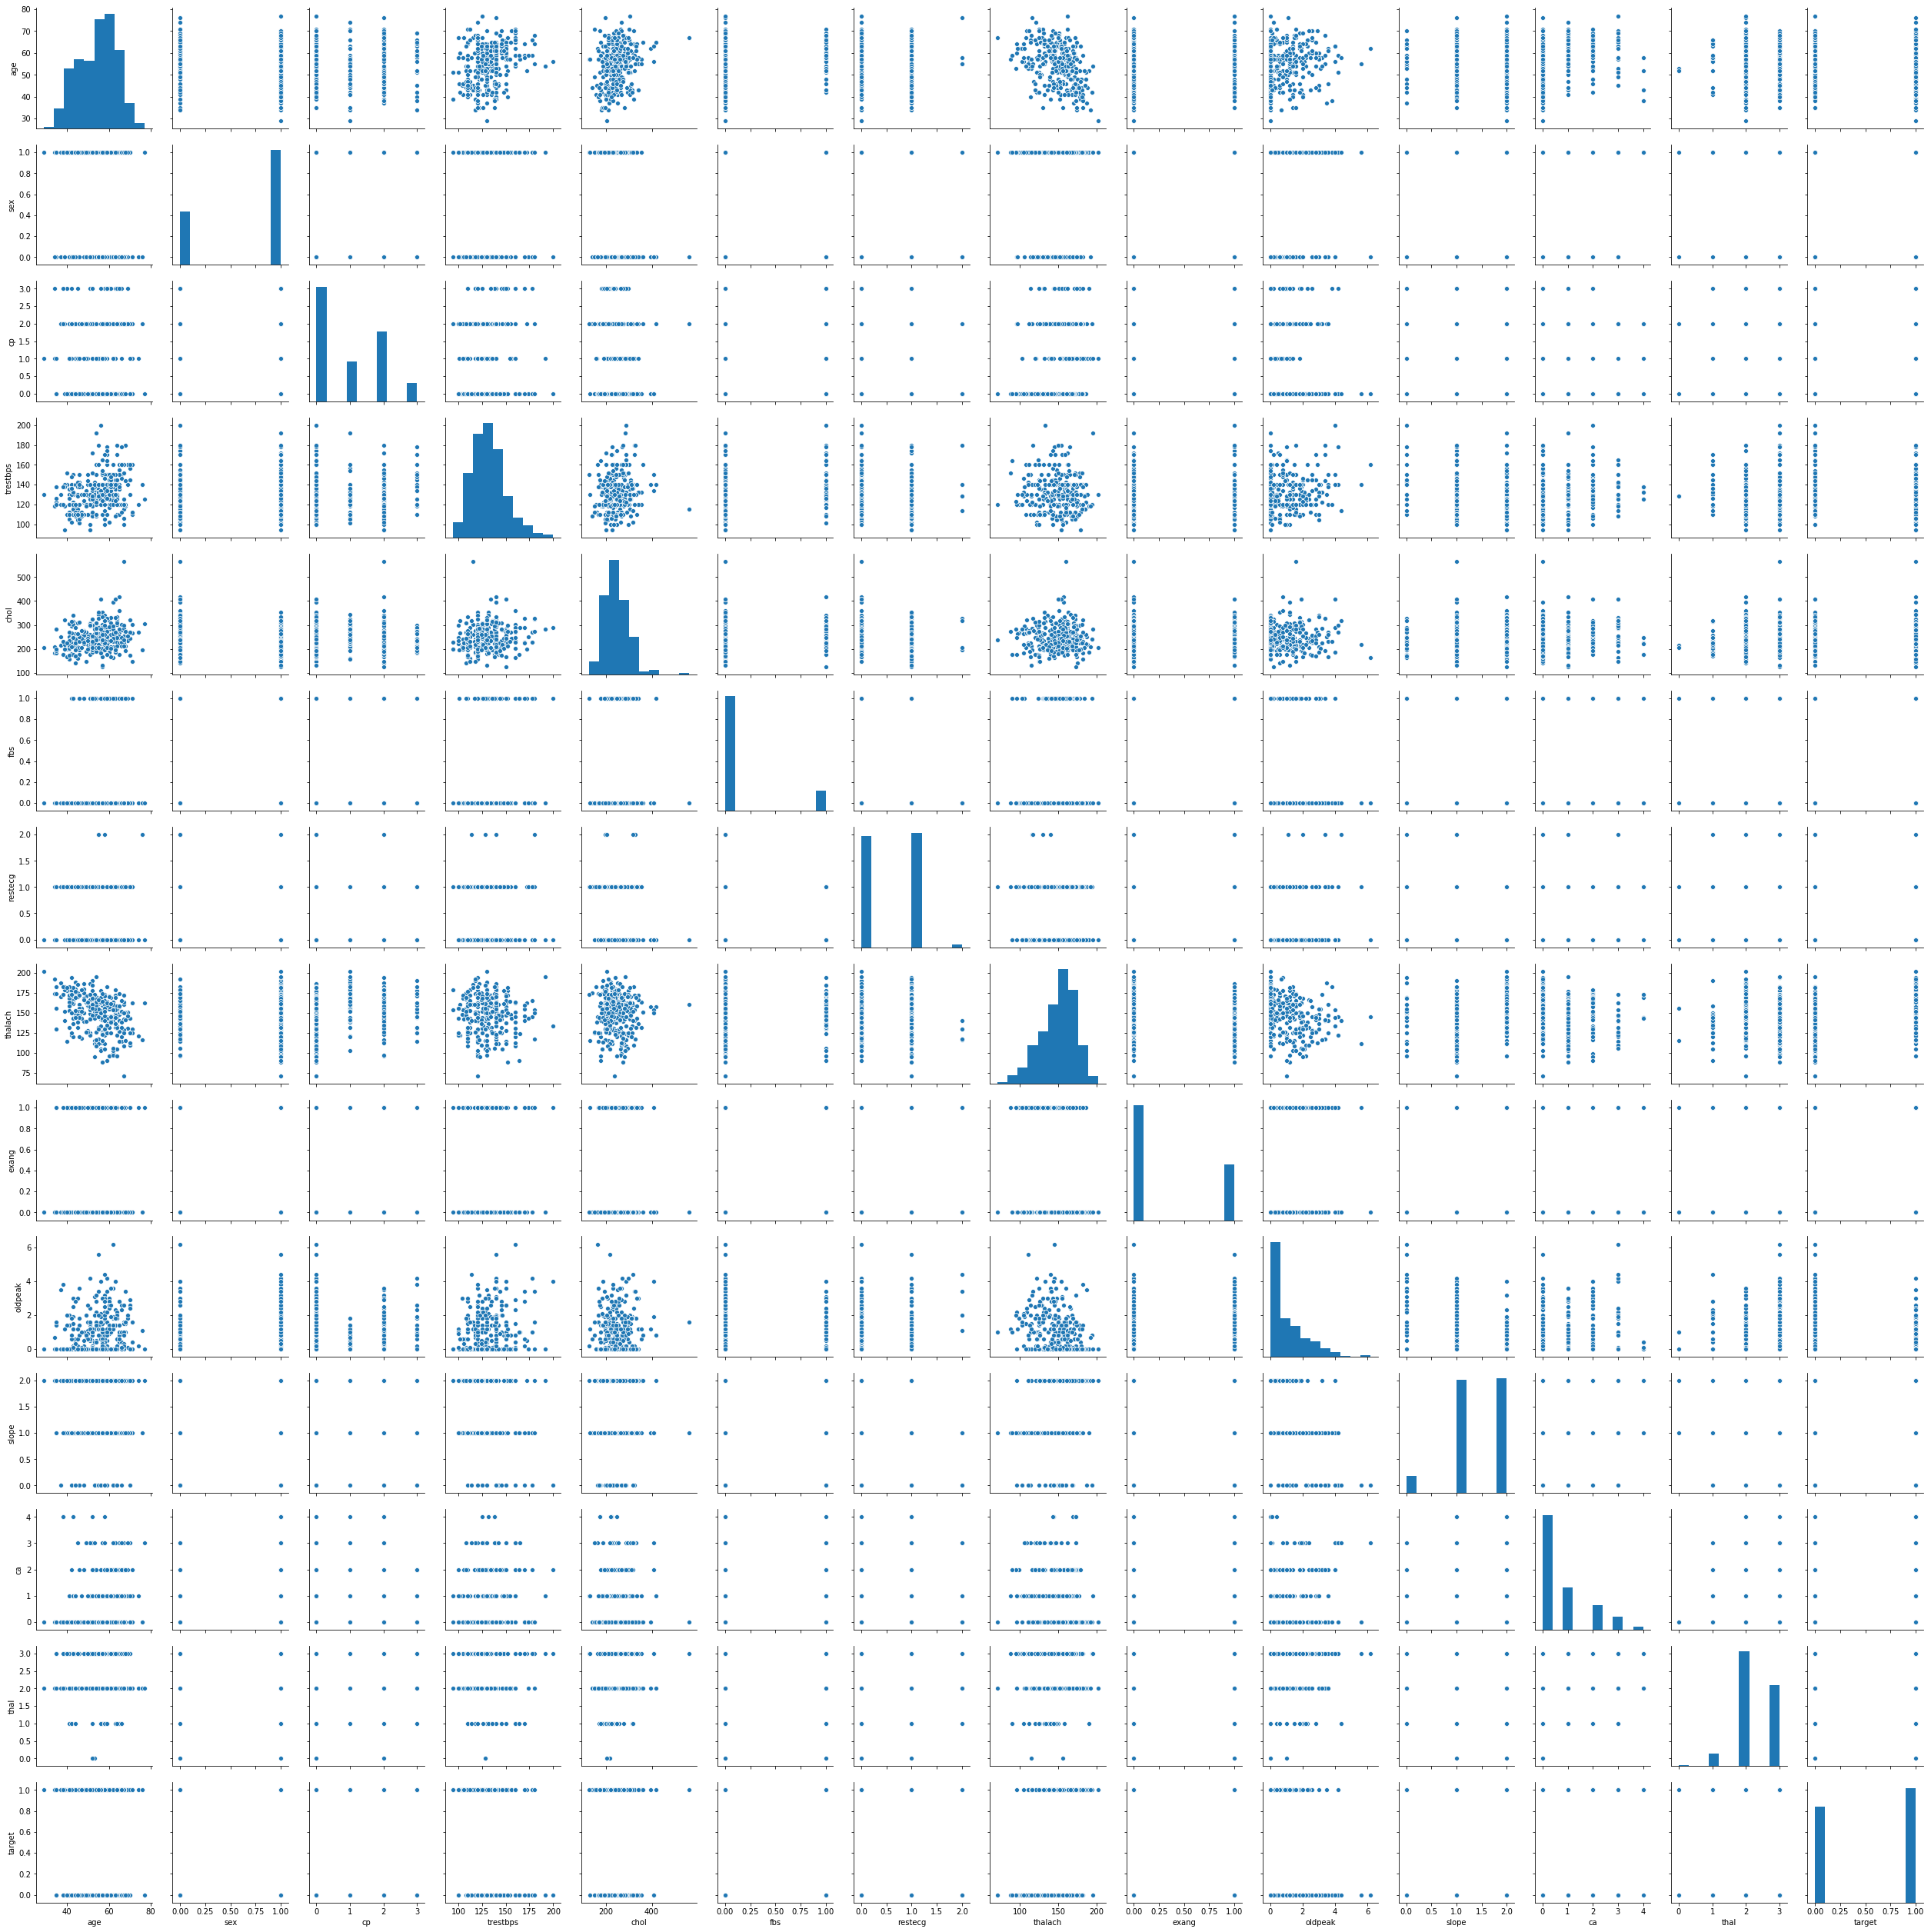

In [10]:
sns.pairplot(heart)

In [11]:
heart_target = heart[heart.columns[-1]]

In [12]:
heart_target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
heart_target = pd.DataFrame(data = heart_target, columns = ["target"])

In [14]:
heart_target.head(5)

,target
0,1
1,1
2,1
3,1
4,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(heart_features, heart_target, test_size =0.2, random_state =43)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg = LogisticRegression(max_iter = 200, random_state = 95, C = 2.5)

In [18]:
lg.fit(X_train, y_train)

C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=95, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
prediction = lg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86        28\n           1       0.82      1.00      0.90        33\n\n   micro avg       0.89      0.89      0.89        61\n   macro avg       0.91      0.88      0.88        61\nweighted avg       0.91      0.89      0.88        61\n'

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[21,  7],
       [ 0, 33]], dtype=int64)